# Trabajo final – Herramientas básicas de visualización de datos (V6)

Caballeros: Dataset `student_depression_dataset`

En este notebook se responden las instrucciones 2 a 7 del trabajo final:

2. Leer el archivo CSV en un DataFrame.  
3. Revisar el contenido, identificar columnas numéricas y mostrar estadísticas básicas.  
4. Elegir 3 características relevantes y elaborar para cada una un gráfico adecuado.  
5. Colocar títulos apropiados y nombres de ejes en los gráficos.  
6. Con las características elegidas en (4), realizar tres gráficas diferentes adicionales.  
7. Realizar 2 gráficas combinando dos características compatibles.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [4]:
# Pregunta 2: leer el CSV a un DataFrame
ruta_csv = "student_depression_dataset.csv"
df = pd.read_csv(ruta_csv)

# Vista rápida de los primeros registros
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
# Pregunta 3: revisar contenido general del dataset

print("Dimensión del DataFrame (filas, columnas):", df.shape)
print("\nInformación general:")
df.info()


Dimensión del DataFrame (filas, columnas): (27901, 18)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float6

In [6]:
# Pregunta 3: identificar columnas numéricas y categóricas

columnas_numericas = df.select_dtypes(include="number").columns.tolist()
columnas_categoricas = df.select_dtypes(exclude="number").columns.tolist()

print("Columnas numéricas:")
for col in columnas_numericas:
    print(" -", col)

print("\nColumnas categóricas:")
for col in columnas_categoricas:
    print(" -", col)


Columnas numéricas:
 - id
 - Age
 - Academic Pressure
 - Work Pressure
 - CGPA
 - Study Satisfaction
 - Job Satisfaction
 - Work/Study Hours
 - Depression

Columnas categóricas:
 - Gender
 - City
 - Profession
 - Sleep Duration
 - Dietary Habits
 - Degree
 - Have you ever had suicidal thoughts ?
 - Financial Stress
 - Family History of Mental Illness


In [7]:
# Pregunta 3: estadísticas básicas de las columnas numéricas

estadisticas_numericas = df[columnas_numericas].describe().T
estadisticas_numericas


,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [10]:
# Creamos una variable categórica más legible para el estado de depresión

df["Depression_Status"] = df["Depression"].map({
    0: "Sin depresión",
    1: "Con depresión"
})

df["Depression_Status"].value_counts()


Depression_Status
Con depresión    16336
Sin depresión    11565
Name: count, dtype: int64

## Pregunta 4 – Elección de 3 características y gráfico adecuado para cada una

Se eligen tres características relevantes del dataset:

1. **Age** (edad del estudiante, variable numérica continua).  
2. **CGPA** (rendimiento académico, numérica continua).  
3. **Depression_Status** (estado de depresión, variable binaria/categórica derivada de `Depression`).

A continuación se presenta **un gráfico adecuado para cada una** de estas características,
considerando el tipo de dato.

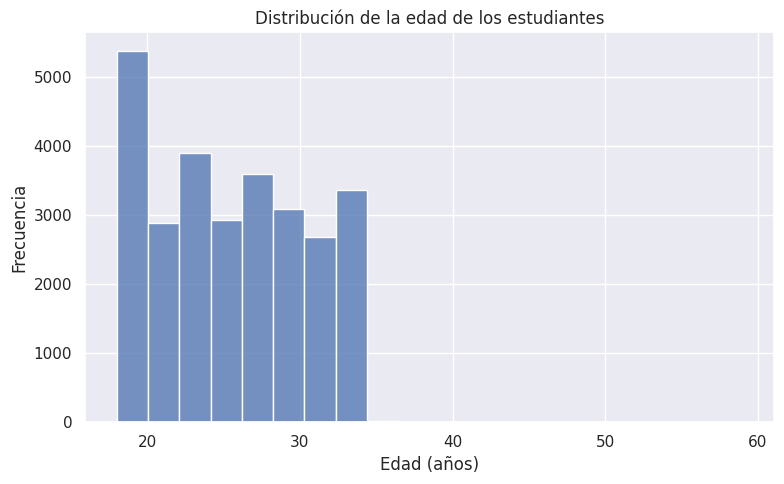

In [11]:
# Pregunta 4 – Gráfico 1: Distribución de la edad (Age)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", bins=20)
plt.title("Distribución de la edad de los estudiantes")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

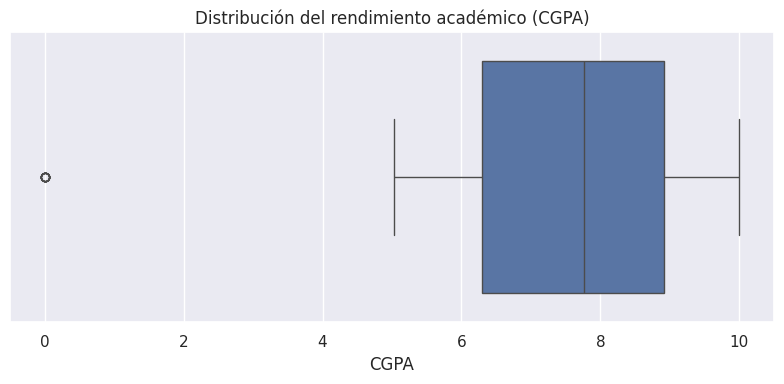

In [12]:
# Pregunta 4 – Gráfico 2: Diagrama de caja para CGPA

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="CGPA")
plt.title("Distribución del rendimiento académico (CGPA)")
plt.xlabel("CGPA")
plt.ylabel("")  # sin etiqueta en el eje Y porque el boxplot es horizontal
plt.tight_layout()
plt.show()


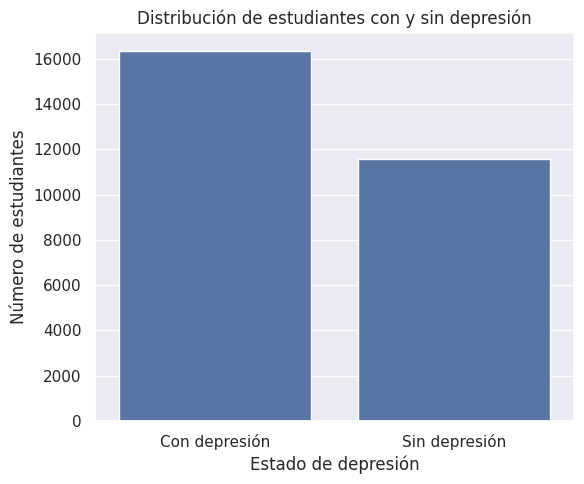

In [13]:
# Pregunta 4 – Gráfico 3: Conteo de estudiantes con y sin depresión

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Depression_Status")
plt.title("Distribución de estudiantes con y sin depresión")
plt.xlabel("Estado de depresión")
plt.ylabel("Número de estudiantes")
plt.tight_layout()
plt.show()

## Pregunta 6 – Tres gráficas diferentes usando las mismas características

Usando las mismas tres características elegidas en la Pregunta 4
(**Age**, **CGPA**, **Depression_Status**), se elaboran **tres gráficas adicionales**,
de tipos distintos a las anteriores:

1. Diagrama de caja de la edad (Age).  
2. Histograma de CGPA con mayor detalle.  
3. Gráfico de pastel (pie chart) para la proporción de estudiantes con y sin depresión.


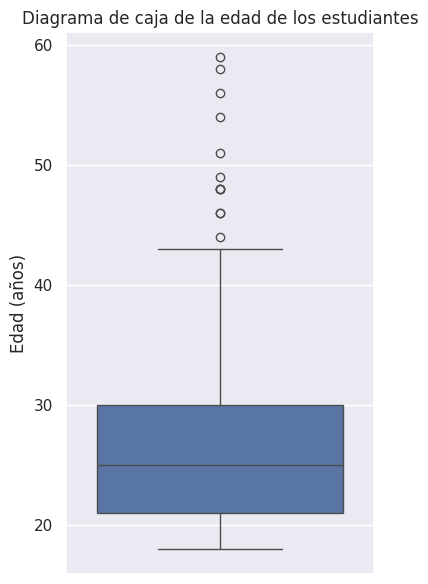

In [14]:
# Pregunta 6 – Gráfico 1: Diagrama de caja de la edad

plt.figure(figsize=(4, 6))
sns.boxplot(data=df, y="Age")
plt.title("Diagrama de caja de la edad de los estudiantes")
plt.xlabel("")
plt.ylabel("Edad (años)")
plt.tight_layout()
plt.show()


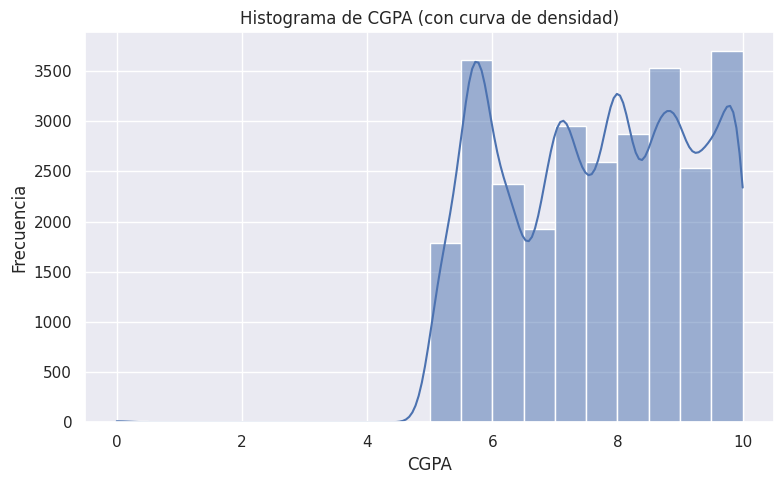

In [15]:
# Pregunta 6 – Gráfico 2: Histograma detallado de CGPA

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="CGPA", bins=20, kde=True)
plt.title("Histograma de CGPA (con curva de densidad)")
plt.xlabel("CGPA")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


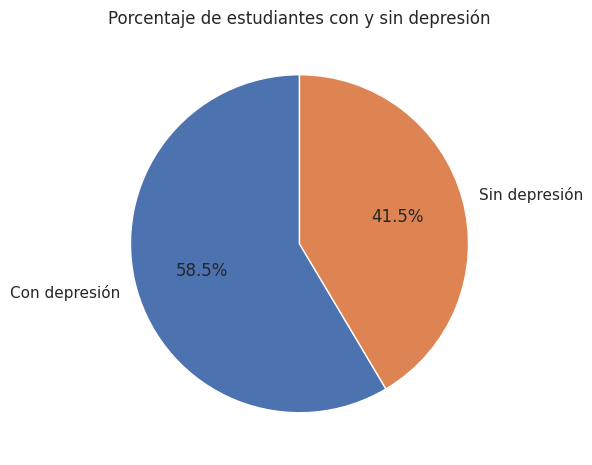

In [16]:
# Pregunta 6 – Gráfico 3: Gráfico de pastel del estado de depresión

plt.figure(figsize=(6, 6))
conteos_dep = df["Depression_Status"].value_counts()

plt.pie(
    conteos_dep,
    labels=conteos_dep.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Porcentaje de estudiantes con y sin depresión")
plt.tight_layout()
plt.show()


## Pregunta 7 – Gráficas combinando dos características compatibles

Se elaboran ahora **dos gráficas** donde se combinan **dos características**:

1. Relación entre **Age** y **CGPA** (dos variables numéricas).  
2. Distribución de **CGPA** según el **estado de depresión** (`Depression_Status`).

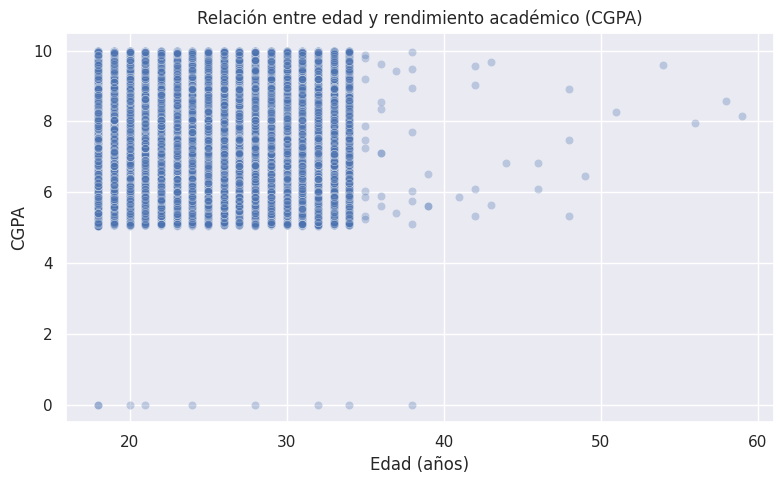

In [18]:
# Pregunta 7 – Gráfico 1: Relación entre edad y CGPA

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="CGPA", alpha=0.3)
plt.title("Relación entre edad y rendimiento académico (CGPA)")
plt.xlabel("Edad (años)")
plt.ylabel("CGPA")
plt.tight_layout()
plt.show()

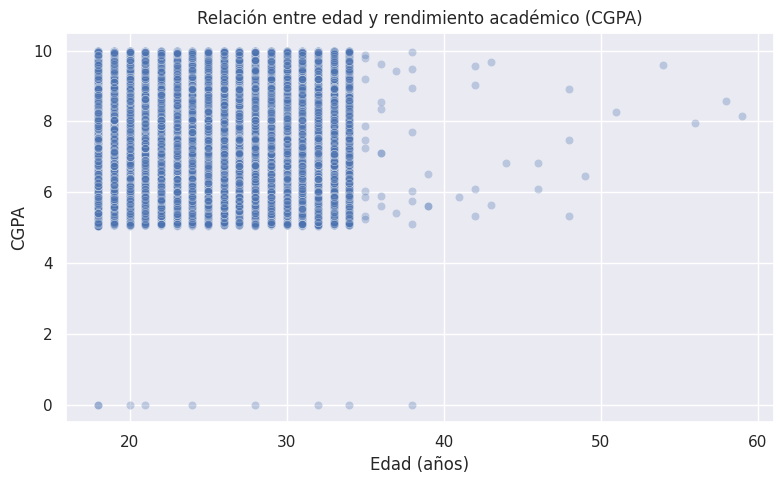

In [20]:
# Pregunta 7 – Gráfico 1: Relación entre edad y CGPA

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="CGPA", alpha=0.3)
plt.title("Relación entre edad y rendimiento académico (CGPA)")
plt.xlabel("Edad (años)")
plt.ylabel("CGPA")
plt.tight_layout()
plt.show()

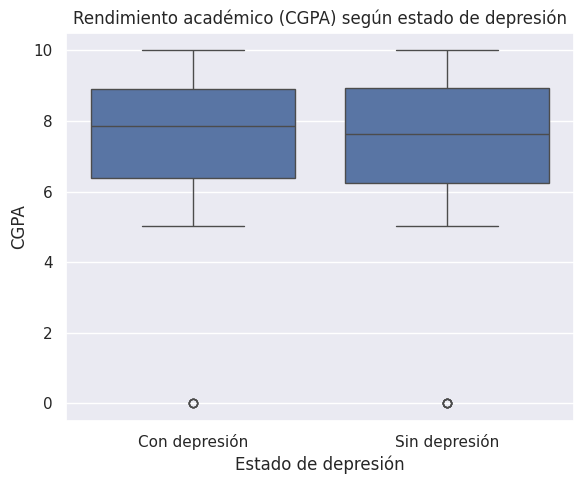

In [21]:
# Pregunta 7 – Gráfico 2: CGPA según estado de depresión

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Depression_Status", y="CGPA")
plt.title("Rendimiento académico (CGPA) según estado de depresión")
plt.xlabel("Estado de depresión")
plt.ylabel("CGPA")
plt.tight_layout()
plt.show()